In [1]:
setwd('/import/a.jif/')

In [2]:
getwd()

[1] "/import/a.jif"

In [4]:
library(Seurat)

In [6]:
dir='.' 
samples=list.files( dir ,pattern = '^GSM')
samples

[1] "GSM5599220_Norm1"   "GSM5599221_Norm2"   "GSM5599222_Norm3"  
 [4] "GSM5599223_Norm4"   "GSM5599224_Norm5"   "GSM5599225_Cancer1"
 [7] "GSM5599226_Cancer2" "GSM5599227_Cancer3" "GSM5599228_Cancer4"
[10] "GSM5599229_Cancer5" "GSM5599230_Cancer6" "GSM5599231_Cancer7"

In [7]:
sceList = lapply(samples,function(pro){ 
 #pro=samples[1]
 folder=file.path(dir ,pro ) 
 print(pro)
 print(folder)
 print(list.files(folder))
 sce=CreateSeuratObject(counts = Read10X(folder),
 project = pro )

 return(sce)
})

[1] "GSM5599220_Norm1"
[1] "./GSM5599220_Norm1"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599221_Norm2"
[1] "./GSM5599221_Norm2"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599222_Norm3"
[1] "./GSM5599222_Norm3"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599223_Norm4"
[1] "./GSM5599223_Norm4"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599224_Norm5"
[1] "./GSM5599224_Norm5"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599225_Cancer1"
[1] "./GSM5599225_Cancer1"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599226_Cancer2"
[1] "./GSM5599226_Cancer2"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599227_Cancer3"
[1] "./GSM5599227_Cancer3"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599228_Cancer4"
[1] "./GSM5599228_Cancer4"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "GSM5599229_Cancer5"
[1] "

In [8]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [9]:
single.ob

An object of class Seurat 
27984 features across 65820 samples within 1 assay 
Active assay: RNA (27984 features, 0 variable features)

In [10]:
immune.combined = single.ob

In [18]:
options(repr.plot.width = 14)

In [19]:
immune.combined[["percent.mt"]] <- PercentageFeatureSet(immune.combined,pattern = "^MT-")

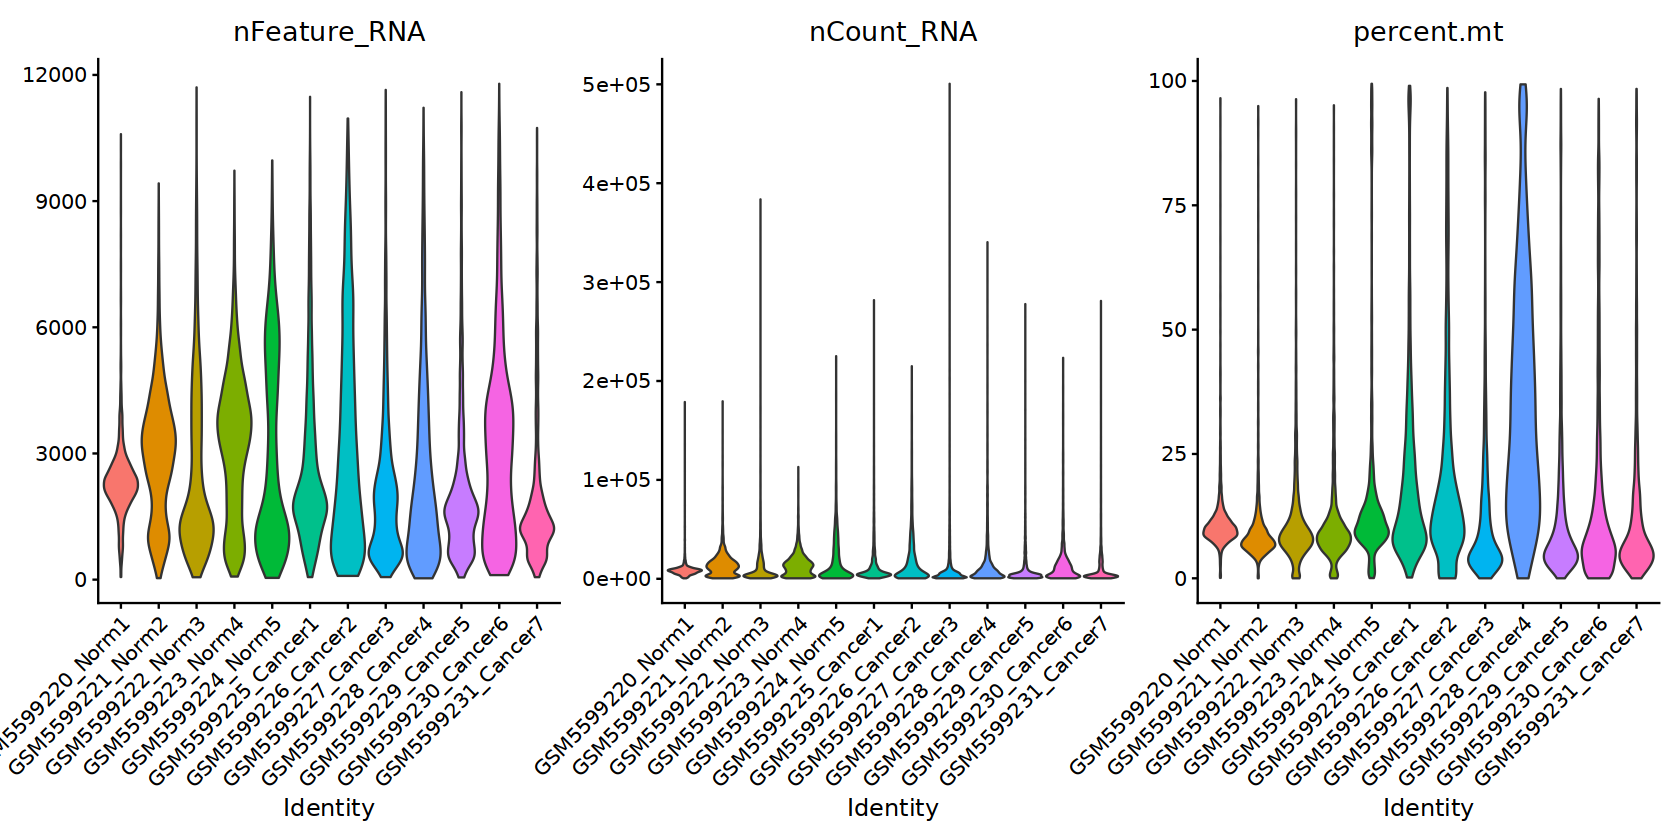

In [20]:
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

In [21]:
library(ggplot2)

In [22]:
ggsave('sc.figure1.pdf',height =  4,width = 9)

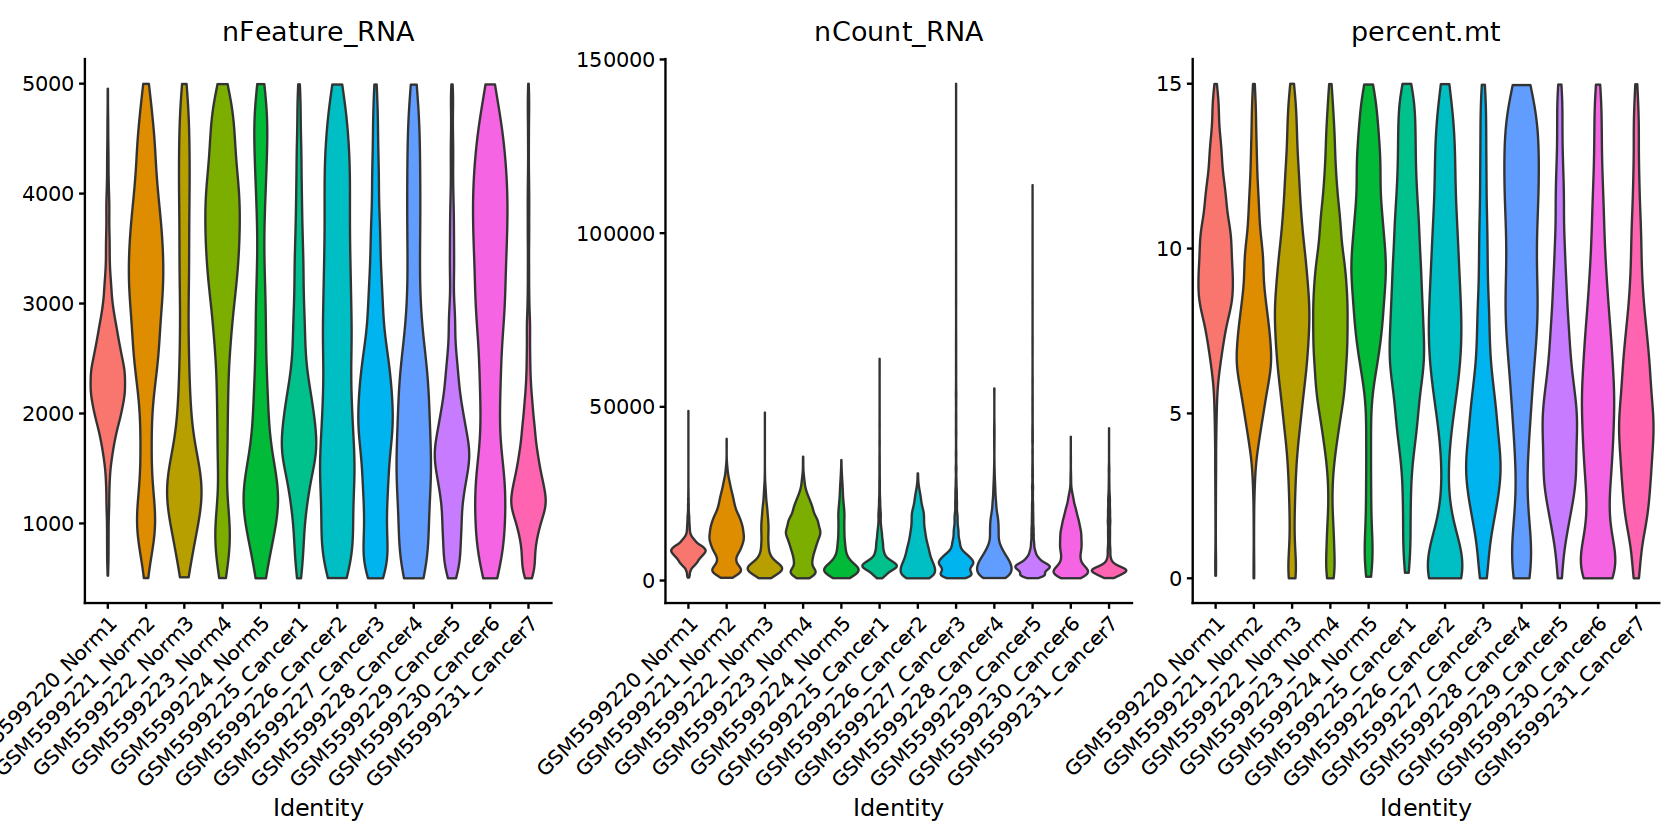

In [25]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 15)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('sc.figure1-1.pdf',height =  4,width = 14)

In [26]:
table(immune.combined$orig.ident)


  GSM5599220_Norm1   GSM5599221_Norm2   GSM5599222_Norm3   GSM5599223_Norm4 
              5476               4210               3007               4585 
  GSM5599224_Norm5 GSM5599225_Cancer1 GSM5599226_Cancer2 GSM5599227_Cancer3 
              1979               4305               1594               3251 
GSM5599228_Cancer4 GSM5599229_Cancer5 GSM5599230_Cancer6 GSM5599231_Cancer7 
               674               3975               2892               3443 

### 去除双细胞

In [27]:
library(DoubletFinder)
library(tidyverse)
library(Seurat)
library(patchwork)

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted 

In [28]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindClusters(immune.combined)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
05:20:56 UMAP embedding parameters a = 0.9922 b = 1.112

05:20:56 Read 39391 rows and found 20 numeric columns

05:20:56 Using Annoy for neighbor search, n_neighbors = 30

05:20:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:21:00 Writing NN index file to temp file /tmp/RtmpS40f4y/file1725e4046dec8

05:21:00 Searching Annoy index using 1 thread, search_k = 3000

05:21:11 Annoy recall = 100%

05:21:11 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39391
Number of edges: 1378437

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 32
Elapsed time: 15 seconds


In [29]:
H9 = immune.combined

In [30]:
paramSweep = function (seu, PCs = 1:20, sct = FALSE, num.cores = 1) 
{
    require(Seurat)
    require(fields)
    require(parallel)
    pK <- c(5e-04, 0.001, 0.005, seq(0.01, 0.3, by = 0.01))
    pN <- seq(0.05, 0.3, by = 0.05)
    min.cells <- round(nrow(seu@meta.data)/(1 - 0.05) - nrow(seu@meta.data))
    pK.test <- round(pK * min.cells)
    pK <- pK[which(pK.test >= 1)]
    orig.commands <- seu@commands
    if (nrow(seu@meta.data) > 10000) {
        real.cells <- rownames(seu@meta.data)[sample(1:nrow(seu@meta.data), 
            10000, replace = FALSE)]
        data <- seu@assays$RNA@counts[, real.cells]
        n.real.cells <- ncol(data)
    }
    if (nrow(seu@meta.data) <= 10000) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts
        n.real.cells <- ncol(data)
    }
    if (num.cores > 1) {
        require(parallel)
        cl <- makeCluster(num.cores)
        output2 <- mclapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct, mc.cores = num.cores)
        stopCluster(cl)
    }
    else {
        output2 <- lapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct)
    }
    sweep.res.list <- list()
    list.ind <- 0
    for (i in 1:length(output2)) {
        for (j in 1:length(output2[[i]])) {
            list.ind <- list.ind + 1
            sweep.res.list[[list.ind]] <- output2[[i]][[j]]
        }
    }
    name.vec <- NULL
    for (j in 1:length(pN)) {
        name.vec <- c(name.vec, paste("pN", pN[j], "pK", pK, 
            sep = "_"))
    }
    names(sweep.res.list) <- name.vec
    return(sweep.res.list)
}

In [31]:
sweep.res.list_kidney <- paramSweep(H9, PCs = 1:20, sct = FALSE)

Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.2.3"

Try help(fields) to get started.

Loading required package: parallel



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

Warning message:
"package 'KernSmooth' was built under R version 4.2.3"
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR

Warning message:
"package 'ROCR' was built under R version 4.2.3"


NULL


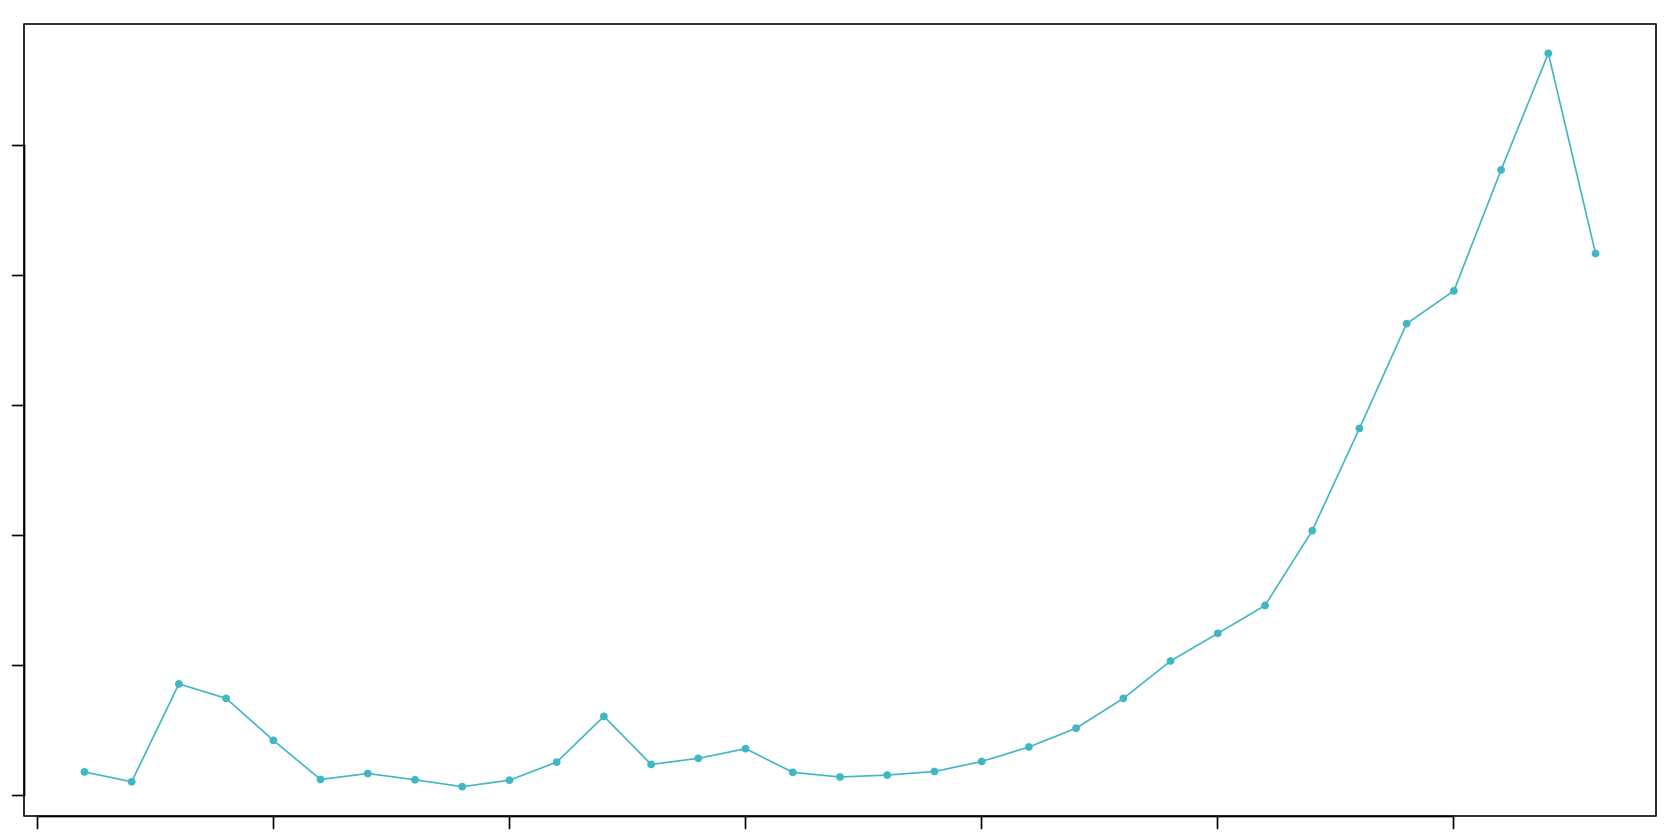

In [32]:
sweep.stats_kidney <- summarizeSweep(sweep.res.list_kidney, GT = FALSE)
bcmvn_kidney <- find.pK(sweep.stats_kidney)

In [33]:
pK_bcmvn <- bcmvn_kidney$pK[which.max(bcmvn_kidney$BCmetric)] %>% as.character() %>% as.numeric()

In [34]:
DoubletRate = ncol(H9)*8*1e-7

In [35]:
DoubletRate

[1] 0.0315128

In [36]:
homotypic.prop <- modelHomotypic(H9$orig.ident)

In [37]:
nExp_poi <- round(DoubletRate*ncol(H9)) 
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [38]:
doubletFinder = function (seu, PCs, pN = 0.25, pK, nExp, reuse.pANN = FALSE, 
    sct = FALSE, annotations = NULL) 
{
    require(Seurat)
    require(fields)
    require(KernSmooth)
    if (reuse.pANN != FALSE) {
        pANN.old <- seu@meta.data[, reuse.pANN]
        classifications <- rep("Singlet", length(pANN.old))
        classifications[order(pANN.old, decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        return(seu)
    }
    if (reuse.pANN == FALSE) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts[, real.cells]
        n_real.cells <- length(real.cells)
        n_doublets <- round(n_real.cells/(1 - pN) - n_real.cells)
        print(paste("Creating", n_doublets, "artificial doublets...", 
            sep = " "))
        real.cells1 <- sample(real.cells, n_doublets, replace = TRUE)
        real.cells2 <- sample(real.cells, n_doublets, replace = TRUE)
        doublets <- (data[, real.cells1] + data[, real.cells2])/2
        colnames(doublets) <- paste("X", 1:n_doublets, sep = "")
        data_wdoublets <- cbind(data, doublets)
        if (!is.null(annotations)) {
            stopifnot(typeof(annotations) == "character")
            stopifnot(length(annotations) == length(Cells(seu)))
            stopifnot(!any(is.na(annotations)))
            annotations <- factor(annotations)
            names(annotations) <- Cells(seu)
            doublet_types1 <- annotations[real.cells1]
            doublet_types2 <- annotations[real.cells2]
        }
        orig.commands <- seu@commands
        if (sct == FALSE) {
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Normalizing Seurat object...")
            seu_wdoublets <- NormalizeData(seu_wdoublets, normalization.method = orig.commands$NormalizeData.RNA@params$normalization.method, 
                scale.factor = orig.commands$NormalizeData.RNA@params$scale.factor, 
                margin = orig.commands$NormalizeData.RNA@params$margin)
            print("Finding variable genes...")
            seu_wdoublets <- FindVariableFeatures(seu_wdoublets, 
                selection.method = orig.commands$FindVariableFeatures.RNA$selection.method, 
                loess.span = orig.commands$FindVariableFeatures.RNA$loess.span, 
                clip.max = orig.commands$FindVariableFeatures.RNA$clip.max, 
                mean.function = orig.commands$FindVariableFeatures.RNA$mean.function, 
                dispersion.function = orig.commands$FindVariableFeatures.RNA$dispersion.function, 
                num.bin = orig.commands$FindVariableFeatures.RNA$num.bin, 
                binning.method = orig.commands$FindVariableFeatures.RNA$binning.method, 
                nfeatures = orig.commands$FindVariableFeatures.RNA$nfeatures, 
                mean.cutoff = orig.commands$FindVariableFeatures.RNA$mean.cutoff, 
                dispersion.cutoff = orig.commands$FindVariableFeatures.RNA$dispersion.cutoff)
            print("Scaling data...")
            seu_wdoublets <- ScaleData(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                model.use = orig.commands$ScaleData.RNA$model.use, 
                do.scale = orig.commands$ScaleData.RNA$do.scale, 
                do.center = orig.commands$ScaleData.RNA$do.center, 
                scale.max = orig.commands$ScaleData.RNA$scale.max, 
                block.size = orig.commands$ScaleData.RNA$block.size, 
                min.cells.to.block = orig.commands$ScaleData.RNA$min.cells.to.block)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                npcs = length(PCs), rev.pca = orig.commands$RunPCA.RNA$rev.pca, 
                weight.by.var = orig.commands$RunPCA.RNA$weight.by.var, 
                verbose = FALSE)
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        if (sct == TRUE) {
            require(sctransform)
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Running SCTransform...")
            seu_wdoublets <- SCTransform(seu_wdoublets)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, npcs = length(PCs))
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        print("Calculating PC distance matrix...")
        dist.mat <- fields::rdist(pca.coord)
        print("Computing pANN...")
        pANN <- as.data.frame(matrix(0L, nrow = n_real.cells, 
            ncol = 1))
        if (!is.null(annotations)) {
            neighbor_types <- as.data.frame(matrix(0L, nrow = n_real.cells, 
                ncol = length(levels(doublet_types1))))
        }
        rownames(pANN) <- real.cells
        colnames(pANN) <- "pANN"
        k <- round(nCells * pK)
        for (i in 1:n_real.cells) {
            neighbors <- order(dist.mat[, i])
            neighbors <- neighbors[2:(k + 1)]
            pANN$pANN[i] <- length(which(neighbors > n_real.cells))/k
            if (!is.null(annotations)) {
                for (ct in unique(annotations)) {
                  neighbors_that_are_doublets = neighbors[neighbors > 
                    n_real.cells]
                  if (length(neighbors_that_are_doublets) > 0) {
                    neighbor_types[i, ] <- table(doublet_types1[neighbors_that_are_doublets - 
                      n_real.cells]) + table(doublet_types2[neighbors_that_are_doublets - 
                      n_real.cells])
                    neighbor_types[i, ] <- neighbor_types[i, 
                      ]/sum(neighbor_types[i, ])
                  }
                  else {
                    neighbor_types[i, ] <- NA
                  }
                }
            }
        }
        print("Classifying doublets..")
        classifications <- rep("Singlet", n_real.cells)
        classifications[order(pANN$pANN[1:n_real.cells], decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("pANN", pN, pK, nExp, sep = "_")] <- pANN[rownames(seu@meta.data), 
            1]
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        if (!is.null(annotations)) {
            colnames(neighbor_types) = levels(doublet_types1)
            for (ct in levels(doublet_types1)) {
                seu@meta.data[, paste("DF.doublet.contributors", 
                  pN, pK, nExp, ct, sep = "_")] <- neighbor_types[, 
                  ct]
            }
        }
        return(seu)
    }
}

In [39]:
scRNA <- doubletFinder(H9, PCs = 1:20, pN = 0.25, pK = pK_bcmvn, 
                          nExp = nExp_poi.adj, reuse.pANN = F, sct = F)

[1] "Creating 13130 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [40]:
colnames(scRNA@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
[3] "nFeature_RNA"                      "percent.mt"                       
[5] "RNA_snn_res.0.8"                   "seurat_clusters"                  
[7] "pANN_0.25_0.29_1121"               "DF.classifications_0.25_0.29_1121"

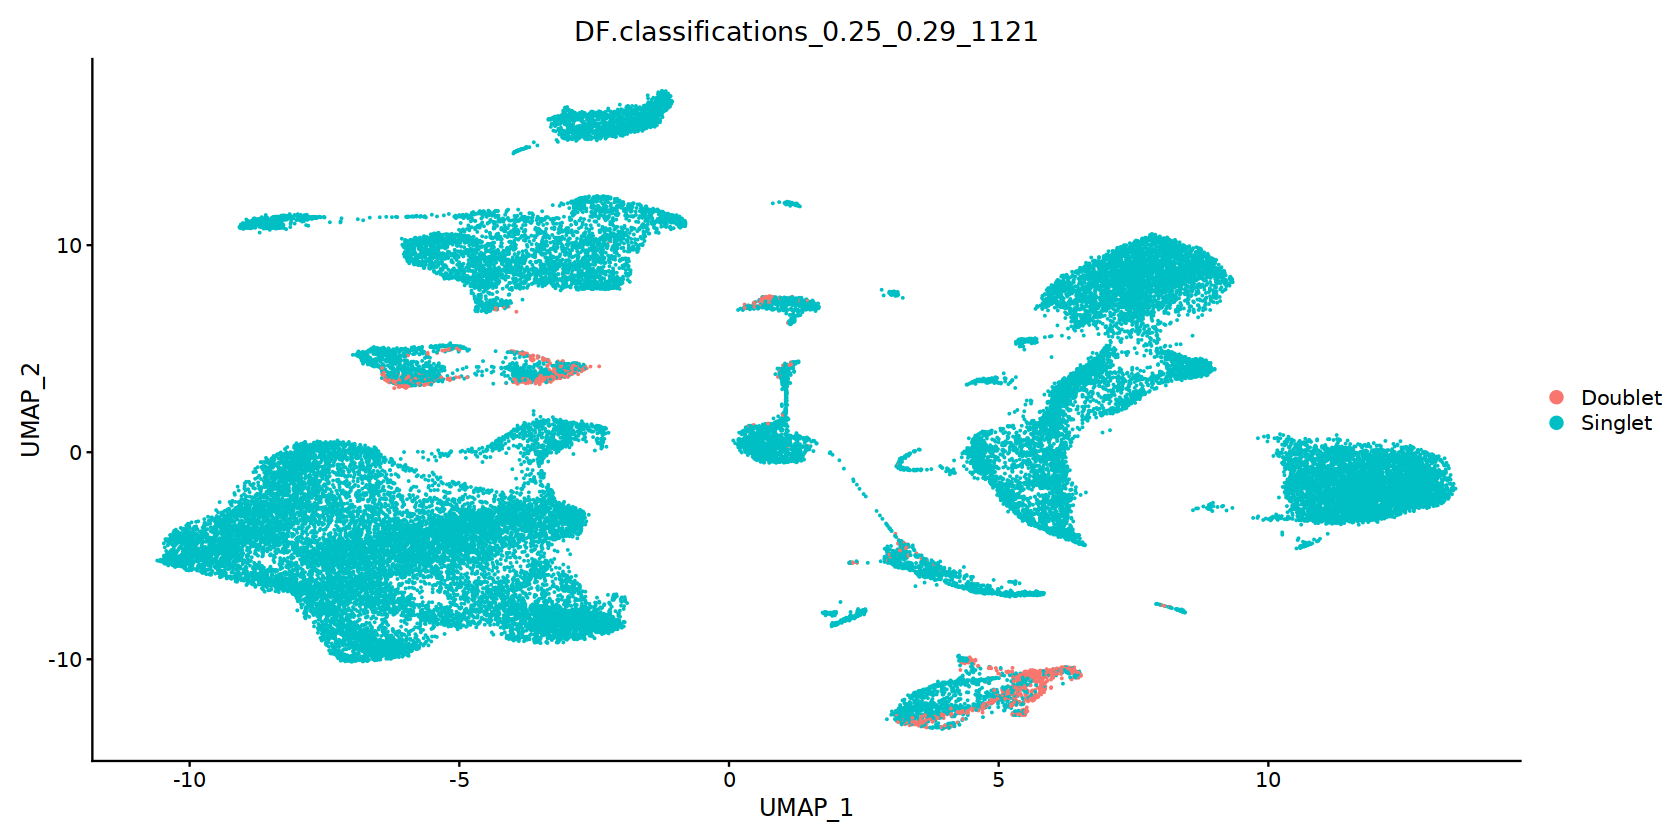

In [42]:
DimPlot(scRNA, reduction = "umap", group.by = "DF.classifications_0.25_0.29_1121")

In [43]:
ggsave('sc.figure2.pdf',height =  4,width = 5)

In [44]:
immune.combined = subset(scRNA, subset = DF.classifications_0.25_0.29_1121  != 'Doublet')

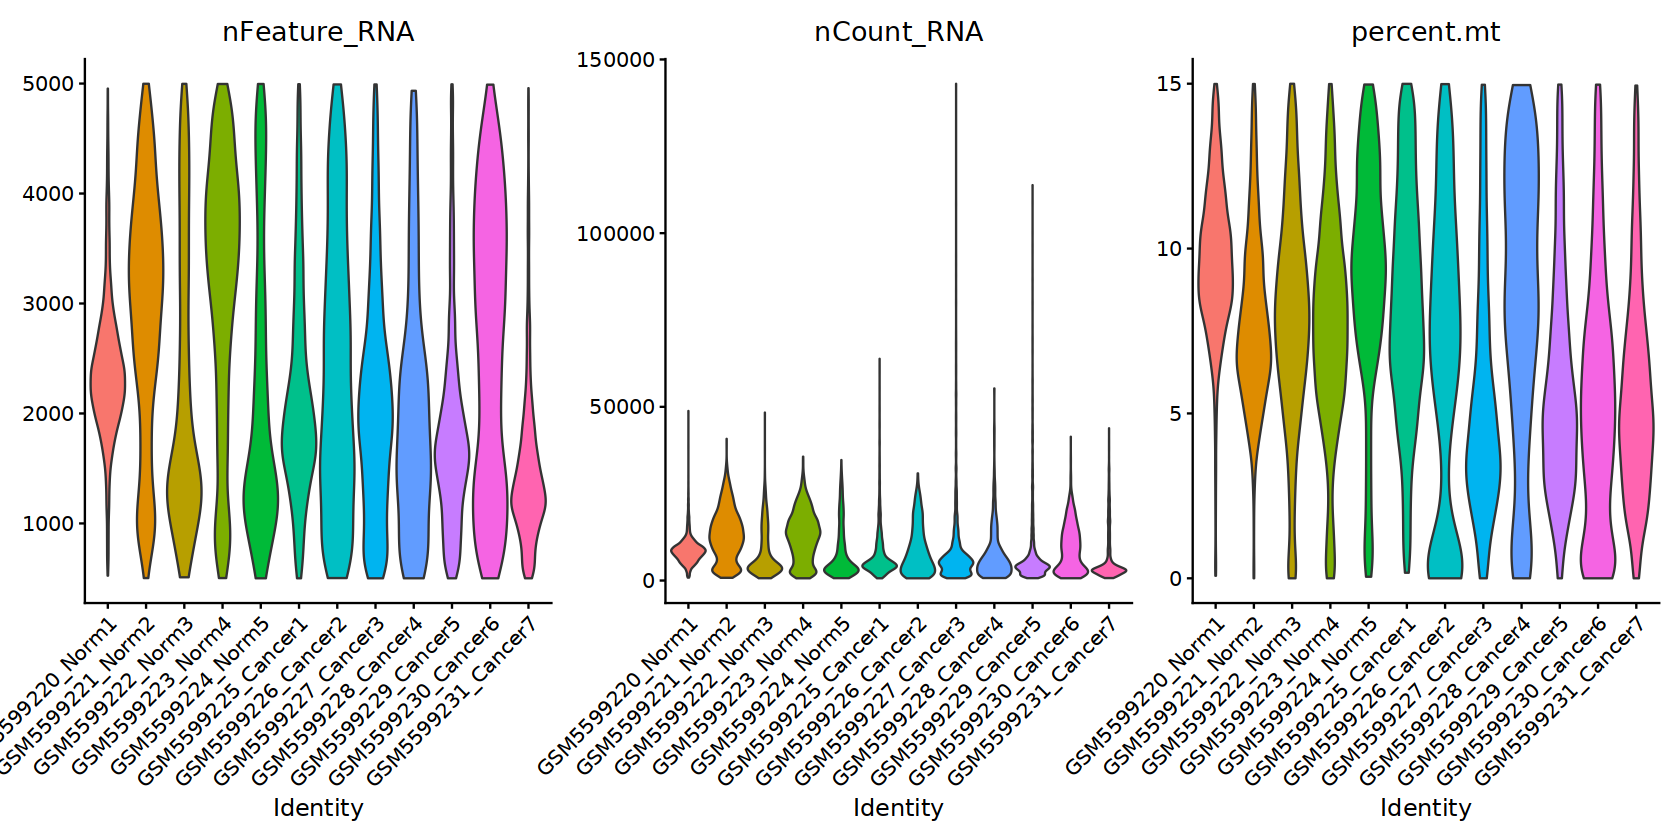

In [45]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 15)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('sc.figure1-1.pdf',height =  4,width = 9)

In [46]:
table(immune.combined$orig.ident)


  GSM5599220_Norm1   GSM5599221_Norm2   GSM5599222_Norm3   GSM5599223_Norm4 
              5473               4186               2943               4335 
  GSM5599224_Norm5 GSM5599225_Cancer1 GSM5599226_Cancer2 GSM5599227_Cancer3 
              1901               4253               1440               3234 
GSM5599228_Cancer4 GSM5599229_Cancer5 GSM5599230_Cancer6 GSM5599231_Cancer7 
               620               3950               2552               3383 

In [39]:
# ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")

# testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

# DefaultAssay(testAB.integrated) <- "integrated"
# # Run the standard workflow for visualization and clustering
# testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# testAB.integrated <- RunPCA(testAB.integrated, npcs = 50, verbose = FALSE)
# testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:30)
# testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)
# testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:30)
# testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:30)

# immune.combined = testAB.integrated

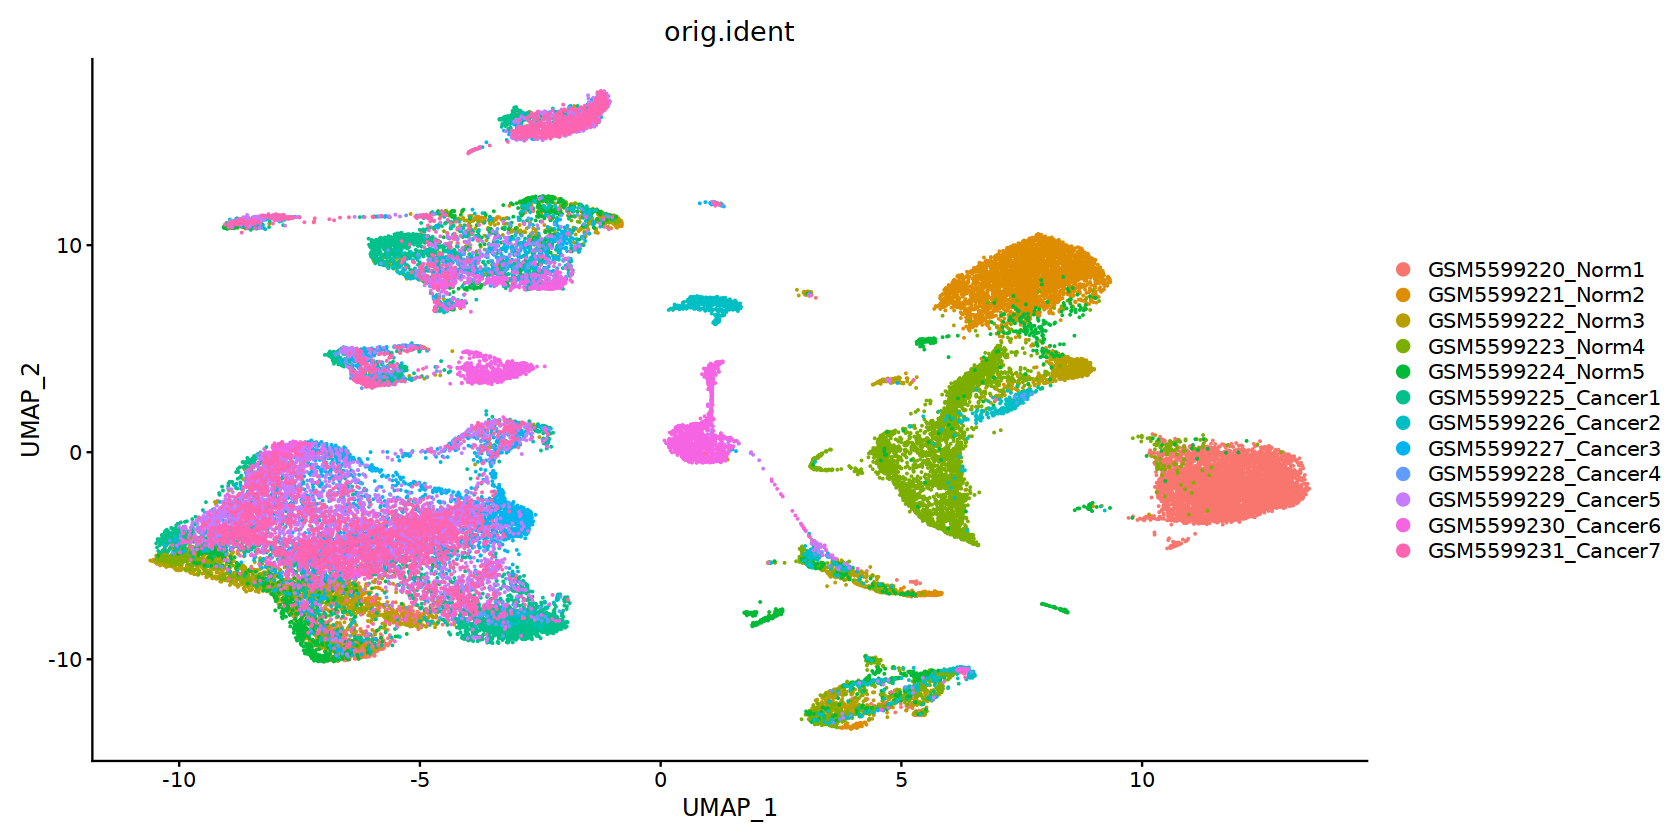

In [47]:
DimPlot(scRNA, reduction = "umap", group.by = "orig.ident")

In [48]:
saveRDS(immune.combined,file = 'sc.before_rename.rds')

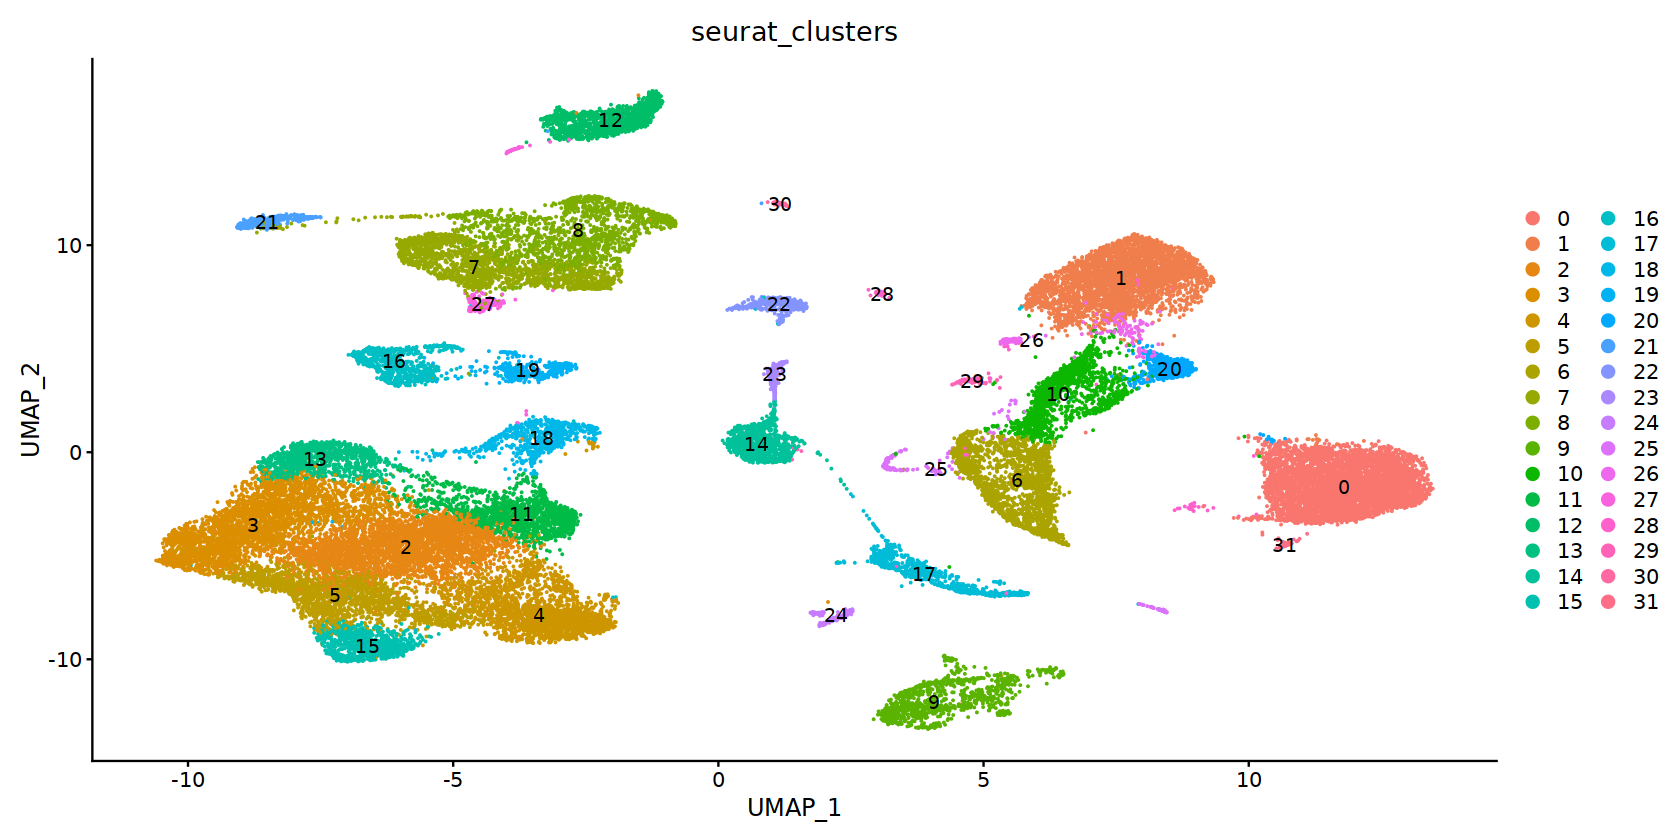

In [49]:
DimPlot(immune.combined, reduction = "umap", group.by  = "seurat_clusters",label = T)

In [50]:
ggsave('sc.figure4.pdf',height =  8,width = 12)

In [51]:
scRNA = immune.combined

In [52]:
library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

Warning message:
"package 'SingleR' was built under R version 4.2.3"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWe

In [53]:
pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

In [54]:
pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

In [55]:
scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [56]:
table(scRNA$celltype,scRNA$seurat_clusters)

                     
                         0    1    2    3    4    5    6    7    8    9   10
  B_cell                 0    0    0    0    0    0    0    0    0    0    0
  Endothelial_cells      0    0    0    0    0    0    0    0    0 1063    0
  Epithelial_cells       0    0    0    0    0    0    0    0    0    0    0
  Fibroblasts            0 3371    0    0    0    0    0    0    0    0 1536
  MSC                    0    0    0    0    0    0    0    0    0    0    0
  Monocyte               0    0    0    0    0    0    0 1858 1617    0    0
  NK_cell                0    0    0    0 2402 2043    0    0    0    0    0
  Smooth_muscle_cells 4600    0    0    0    0    0 1940    0    0    0    0
  T_cells                0    0 3308 3299    0    0    0    0    0    0    0
  Tissue_stem_cells      0    0    0    0    0    0    0    0    0    0    0
                     
                        11   12   13   14   15   16   17   18   19   20   21
  B_cell                 0 1291 

In [57]:
table(scRNA$celltype)


             B_cell   Endothelial_cells    Epithelial_cells         Fibroblasts 
               1710                1063                1537                6532 
                MSC            Monocyte             NK_cell Smooth_muscle_cells 
                194                3735                6227                7859 
            T_cells   Tissue_stem_cells 
               9109                 304 

In [58]:
Idents(scRNA) = 'celltype'

In [59]:
library(Seurat)

In [60]:
options(repr.plot.width = 8,repr.plot.height = 5)

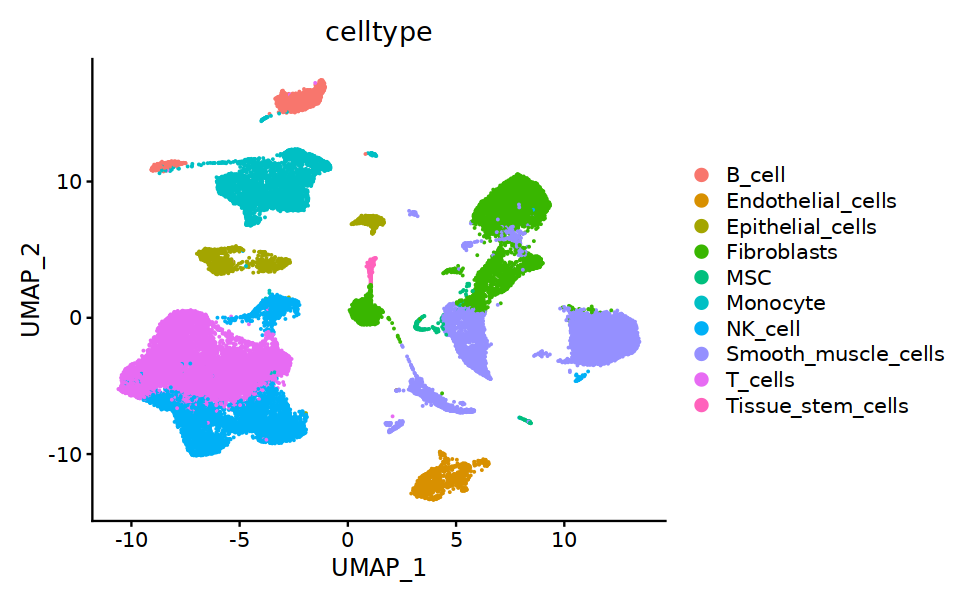

In [61]:
DimPlot(scRNA, group.by="celltype", label=F, label.size=5, reduction='umap')

In [58]:
library(ggplot2)

In [62]:
ggsave('sc.figure5.pdf',height =  5,width = 9)

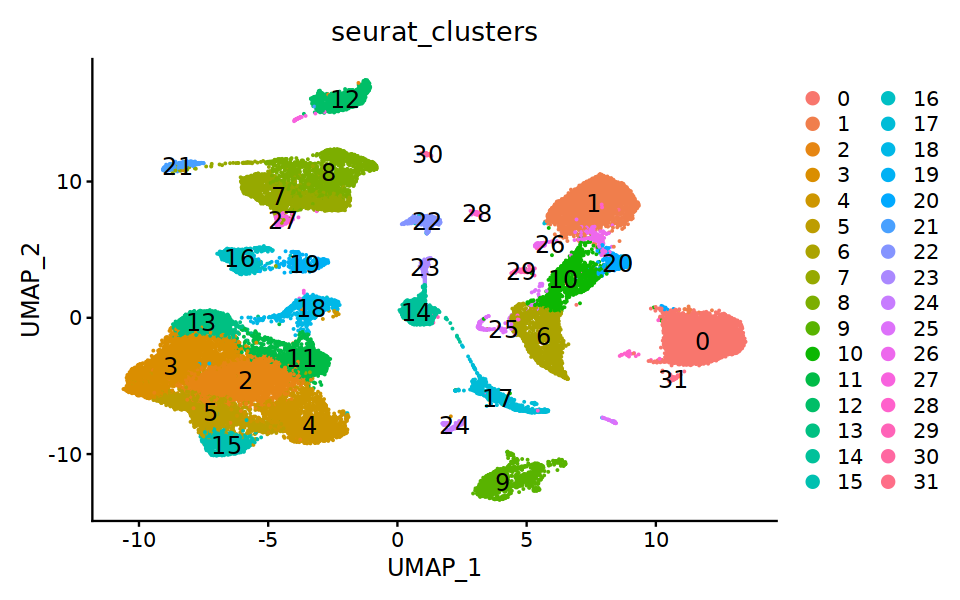

In [63]:
DimPlot(scRNA, group.by="seurat_clusters", label=T, label.size=5, reduction='umap')

In [64]:
ggsave('sc.figure6.pdf',height =  8,width = 9)

In [65]:
table(scRNA$orig.ident)


  GSM5599220_Norm1   GSM5599221_Norm2   GSM5599222_Norm3   GSM5599223_Norm4 
              5473               4186               2943               4335 
  GSM5599224_Norm5 GSM5599225_Cancer1 GSM5599226_Cancer2 GSM5599227_Cancer3 
              1901               4253               1440               3234 
GSM5599228_Cancer4 GSM5599229_Cancer5 GSM5599230_Cancer6 GSM5599231_Cancer7 
               620               3950               2552               3383 

In [66]:
scRNA$group = ifelse(scRNA@meta.data$orig.ident %in%c('GSM5599220_Norm1', 'GSM5599221_Norm2', 'GSM5599222_Norm3' ,
                                                      'GSM5599223_Norm4', 'GSM5599224_Norm5', 'CTR-6.matrix' ),'Con','Tumor' )

In [67]:
Idents(scRNA) = 'group'

In [68]:
table(Idents(scRNA),scRNA$celltype)

       
        B_cell Endothelial_cells Epithelial_cells Fibroblasts  MSC Monocyte
  Con      121               929               26        5282  191     1038
  Tumor   1589               134             1511        1250    3     2697
       
        NK_cell Smooth_muscle_cells T_cells Tissue_stem_cells
  Con      2759                7688     803                 1
  Tumor    3468                 171    8306               303

In [69]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$group)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('Con', 'Tumor'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)


  Con Tumor 
18838 19432 


Smooth_muscle_cells             NK_cell            Monocyte   Endothelial_cells 
        0.205356676         0.162712307         0.097596028         0.027776326 
        Fibroblasts             T_cells              B_cell                 MSC 
        0.170681996         0.238019336         0.044682519         0.005069245 
   Epithelial_cells   Tissue_stem_cells 
        0.040162007         0.007943559 

                     
                       Con Tumor
  Smooth_muscle_cells 7688   171
  NK_cell             2759  3468
  Monocyte            1038  2697
  Endothelial_cells    929   134
  Fibroblasts         5282  1250
  T_cells              803  8306
  B_cell               121  1589
  MSC                  191     3
  Epithelial_cells      26  1511
  Tissue_stem_cells      1   303

Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


## 往下都是没有运行的

In [70]:
options(repr.plot.height = 6,rpr.plot.wdith = 5)

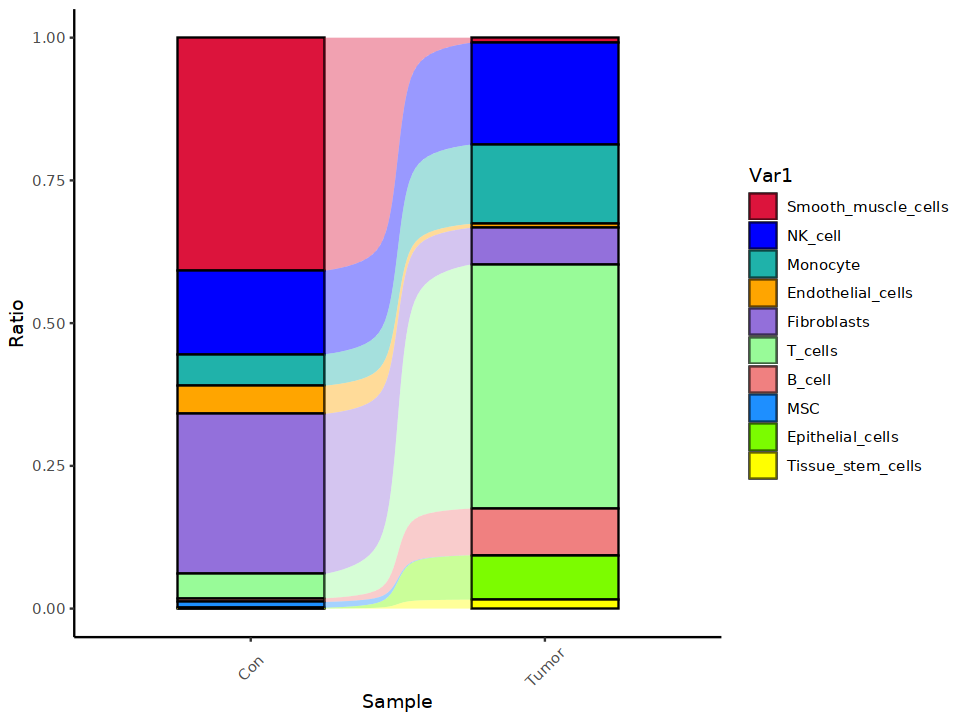

In [71]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [72]:
ggsave('sc.figure6.pdf',height =  5,width = 4)

In [73]:
getwd()

[1] "/import/a.jif"

In [74]:
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Smooth_muscle_cells

Calculating cluster NK_cell

Calculating cluster Monocyte

Calculating cluster Endothelial_cells

Calculating cluster Fibroblasts

Calculating cluster T_cells

Calculating cluster B_cell

Calculating cluster MSC

Calculating cluster Epithelial_cells

Calculating cluster Tissue_stem_cells



In [76]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

In [77]:
unique(scRNA$celltype)

[1] "Smooth_muscle_cells" "NK_cell"             "Monocyte"           
 [4] "Endothelial_cells"   "Fibroblasts"         "T_cells"            
 [7] "B_cell"              "MSC"                 "Epithelial_cells"   
[10] "Tissue_stem_cells"

In [79]:
gene_cell_exp <- AverageExpression(scRNA,
                                   features = unique(top5$gene),
                                   group.by = 'celltype',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)

In [80]:
gene_cell_exp = gene_cell_exp[,c('Smooth_muscle_cells','NK_cell','Monocyte','Endothelial_cells','Fibroblasts',
                                 'T_cells','B_cell','MSC','Epithelial_cells','Tissue_stem_cells')]

In [82]:
library(ComplexHeatmap)
#顶部细胞类型注释
df <- data.frame(colnames(gene_cell_exp))
colnames(df) <- 'class'

In [83]:
df$class = factor(df$class,levels = c('Smooth_muscle_cells','NK_cell','Monocyte','Endothelial_cells','Fibroblasts',
                                 'T_cells','B_cell','MSC','Epithelial_cells','Tissue_stem_cells'))

In [ ]:
# mycol22 <- c("#b0d45d","#7fb961","#4c9568","#356d67","#42465c","#5066a1",
# "#76afda","#abddff","#dcf2ff","#fddbc8","#ffe788","#ffc556",
# "#e8743c","#f06152","#b20000","#eb998b","#a14462","#cca69c",
# "#9e6c69","#7d4444","#562e3c","#35212e")

In [85]:
top_anno = HeatmapAnnotation(df = df,#细胞名/cluster
                             border = T,
                             show_annotation_name = F,
                             gp = gpar(col = 'black'),
                             col = list(class = c('Smooth_muscle_cells' = '#A0CCFF','NK_cell'="#2F528F",
                                                  "Monocyte"="#E3AD68",'Endothelial_cells'='#e8743c','Fibroblasts'='#f06152',
                                                  'T_cells'='#dcf2ff','B_cell'='#356d67',
                                                 'MSC'='#42465c','Epithelial_cells'='#b0d45d','Tissue_stem_cells'='#7fb961')))

In [86]:
#数据标准化缩放一下
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))

In [93]:
options(repr.plot.height = 13,repr.plot.width = 8)

In [95]:
p= Heatmap(marker_exp,
        cluster_rows = F,
        cluster_columns = F,
        show_column_names = F,
        show_row_names = T,
        column_title = NULL,
        heatmap_legend_param = list(
          title=' '),
        col = colorRampPalette(c("#0D72C3","white","#E35B10"))(100),
        border = 'black',
        rect_gp = gpar(col = "black", lwd = 1),
        row_names_gp = gpar(fontsize = 13),
        column_names_gp = gpar(fontsize = 13),
        top_annotation = top_anno)

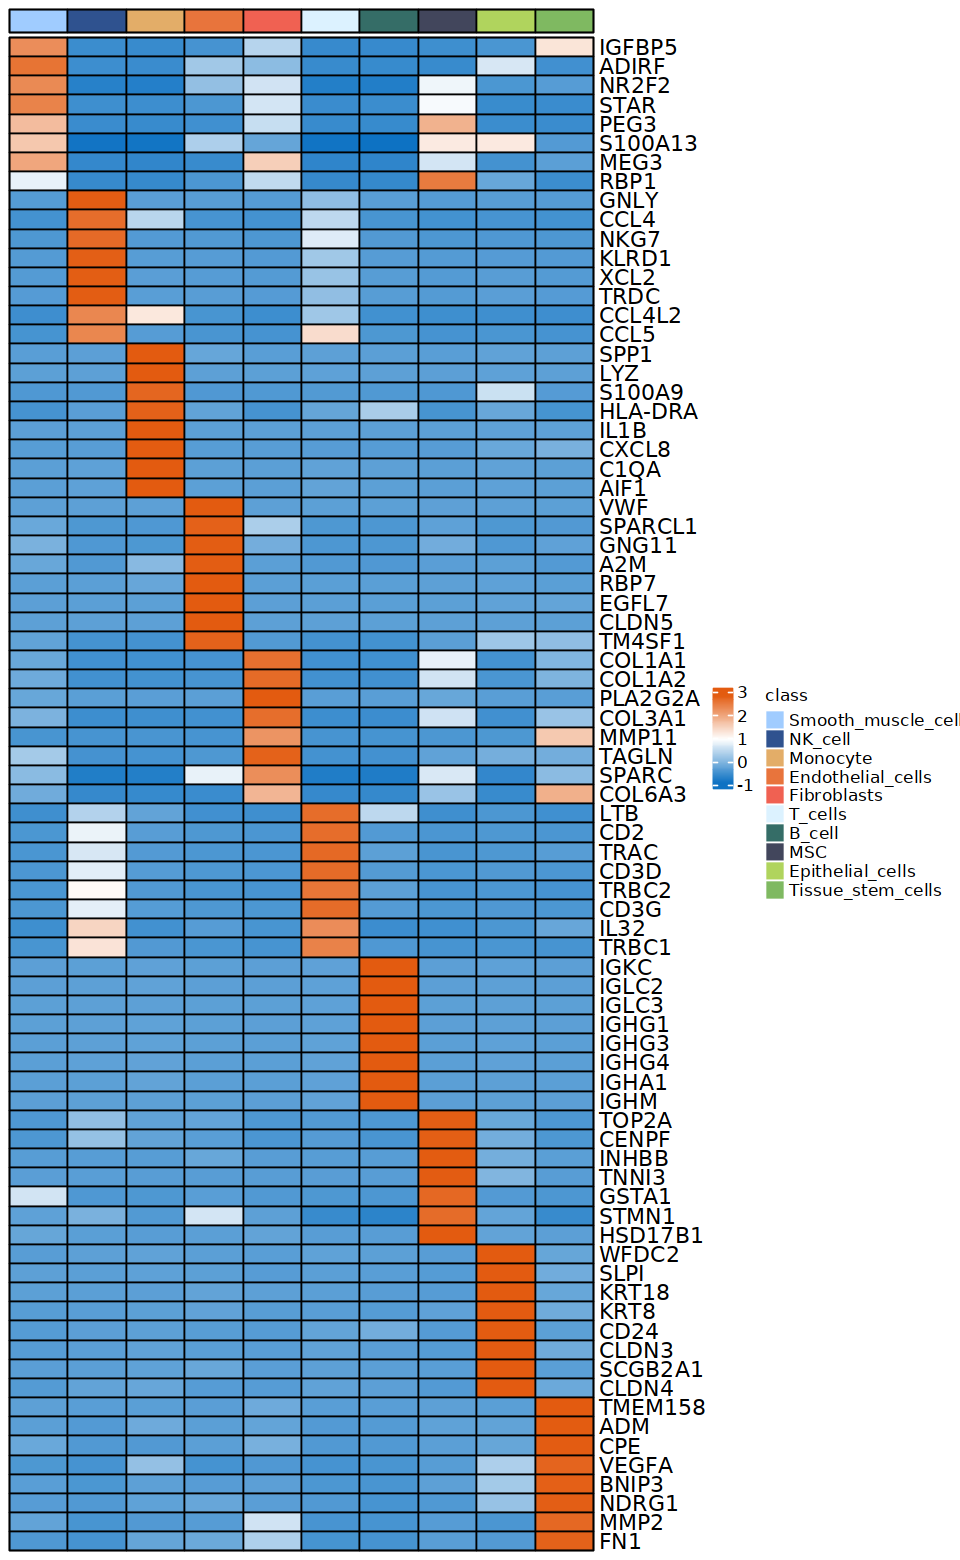

In [96]:
p

In [97]:
pdf('sc.heatmap1.pdf',height = 13,width = 10)
print(p)
dev.off()

png 
  2

In [100]:
table(scRNA$celltype)


             B_cell   Endothelial_cells    Epithelial_cells         Fibroblasts 
               1710                1063                1537                6532 
                MSC            Monocyte             NK_cell Smooth_muscle_cells 
                194                3735                6227                7859 
            T_cells   Tissue_stem_cells 
               9109                 304 

In [99]:
Idents(scRNA) = 'celltype'

In [102]:
Tcell = subset(scRNA,idents = c('T_cells','NK_cell'))

In [103]:
B_cell = subset(scRNA,idents = 'B_cell')

In [108]:
MSC = subset(scRNA,idents = 'MSC')

In [104]:
saveRDS(scRNA,file = 'after_ano.rds')

In [105]:
saveRDS(Tcell,file = 'Tcell.after_ano.rds')

In [106]:
saveRDS(B_cell,file = 'B_cell.after_ano.rds')

In [109]:
saveRDS(MSC,file = 'MSC.after_ano.rds')